# Simple RNN

    state_t = 0
    for input_t in input_sequence:
        output_t = f(input_t, state_t)
        state_t = output_t

The previous output becomes the state for the next iteration.

    f(input_t, state_t) = activation(dot(W, input_t) + dot(U, state_t) + b)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timesteps = 100       # number of timesteps in the input sequence
input_features = 32   # dimensionality of the input feature space
output_features = 64  # dimensionality of the output feature space

In [3]:
inputs = np.random.random((timesteps, input_features))

In [4]:
state_t = np.zeros((output_features,))

In [5]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

In [6]:
successive_outputs = []
for input_t in inputs: 
    # dim(input_t) = (input_features,) (vector)
    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis = 0)

In [7]:
print(final_output_sequence.shape)
print(final_output_sequence)

(6400,)
[0.99999998 1.         1.         ... 1.         1.         1.        ]


### A recurrent layer in Keras

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 32))
model.add(SimpleRNN(units = 32))

model.summary()

# output dimension is 2D (batch size, input_features) (output_t)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))

model.summary()

# output dimension is 3D (batch size, timesteps, input_features)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))  # All intermediate recurrent layers 
model.add(SimpleRNN(32, return_sequences = True))  # return squences.
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
max_features = 10000
max_length = 500      # cut off texts after this many word
batch_size = 32

In [6]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [7]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = max_length)
input_test = sequence.pad_sequences(input_test, maxlen = max_length)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


- Training the model with Embedding and SimpleRNN layers

In [8]:
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(input_train, y_train, validation_split = 0.2,
                    epochs = 10, batch_size = 128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6448 - acc: 0.6119 - val_loss: 0.6131 - val_acc: 0.6480
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.4168 - acc: 0.8235 - val_loss: 0.6246 - val_acc: 0.7176
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3107 - acc: 0.8732 - val_loss: 0.3816 - val_acc: 0.8374
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2275 - acc: 0.9129 - val_loss: 0.3672 - val_acc: 0.8536
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1658 - acc: 0.9408 - val_loss: 0.3652 - val_acc: 0.8738
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1087 - acc: 0.9642 - val_loss: 0.3931 - val_acc: 0.8528
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0719 - acc: 0.9772 - val_loss: 0.4303 - val_acc:

In [19]:
model.save_weights('IMDB-simpleRNN.h5')

In [32]:
def history_plot(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc)+1)

    plt.plot(epochs, loss, 'k', label = 'Training Loss')
    plt.plot(epochs, val_loss, ':r', label = 'Valdiation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()
    
    plt.plot(epochs, acc, '-k', label = 'Training Acc')
    plt.plot(epochs, val_acc, ':r', label = 'Validation Acc')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

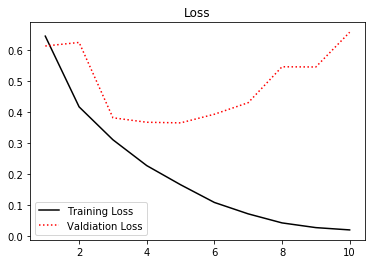

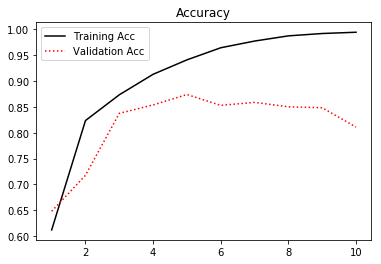

In [33]:
history_plot(history)

In [39]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 19s 773us/step


[0.6860386684703826, 0.81076]

# LSTM

**All Transformations :**    `y = activation(dot(state_t, U) + dot(input_t, W) + b)`
    
    outout_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
    
    i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
    f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
    k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
    
You obtain the new carry state (the next c_t) by combining i_t, f_t and k_t.

    c_t+1 = i_t * k_t + c_t * f_t
    

### A concrete LSTM example in Keras

In [13]:
from keras.layers import LSTM

In [14]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation = 'sigmoid'))

model_lstm.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_lstm = model_lstm.fit(input_train, y_train, validation_split = 0.2,
                              epochs = 10, batch_size = 128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.5052 - acc: 0.7643 - val_loss: 0.3376 - val_acc: 0.8576
Epoch 2/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2886 - acc: 0.8866 - val_loss: 0.3210 - val_acc: 0.8592
Epoch 3/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2297 - acc: 0.9120 - val_loss: 0.3201 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1928 - acc: 0.9286 - val_loss: 0.3118 - val_acc: 0.8636
Epoch 5/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1722 - acc: 0.9375 - val_loss: 0.3022 - val_acc: 0.8874
Epoch 6/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1577 - acc: 0.9416 - val_loss: 0.4594 - val_acc: 0.8122
Epoch 7/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.1408 - acc: 0.9501 - val_loss: 0.5605 - val_acc:

In [37]:
model_lstm.save_weights('IMDB-LSTM.h5')

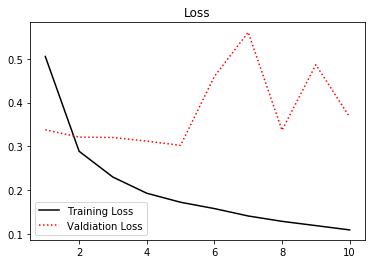

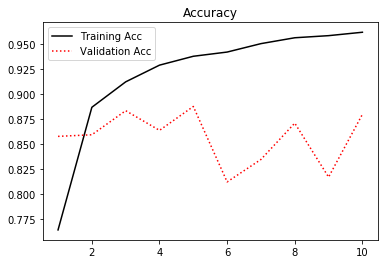

In [38]:
history_plot(history_lstm)

In [17]:
model_lstm.load_weights('IMDB-LSTM.h5')

In [18]:
model_lstm.evaluate(input_test, y_test)

25000/25000 [==============================] - 44s 2ms/step


[0.4128850857424736, 0.86556]